# Exercice 3 - Review questions
TP fait par : Leo Pellandini, Steven Jaquet et André Quintas Gervasio


**a) Assuming an univariate input *x*, what is the complexity at inference time of a Bayesian classifier based on histogram computation of the likelihood ?**

It all depends on the number of classes in the current classification task. Indeed, all the different steps that are done using Bayes classifier are done for each and every class individually.

Example: as seen in class, the likelihood p(x | given class) is obtained by finding which bin the input x falls into within each class’s histogram. This lookup must be done for every class individually.

**b) Bayesian models are said to be generative as they can be used to generate new samples. Taking the implementation of the exercise 1.a, explain the steps to generate new samples using the system you have put into place.**
 

It is done by using the already trained model. We first sample a class according to its prior probability, and then generate the corresponding feature values using the class-conditional histograms (likelihoods) obtained during training, so it becomes purely probabilistic.

***Optional*: Provide an implementation in a function generateSample(priors, histValues, edgeValues, n)**

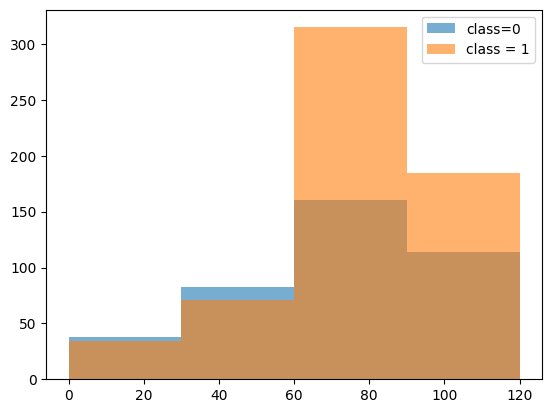

In [32]:
import matplotlib.pyplot as plt
import numpy as np


def generateSample(priors, histValues, edgeValues, n):
    # features and their classes
    X, y = [], []
    
    # normalized version of histograms, where a hist is a likelihood for a class
    probs = [h / np.sum(h) for h in histValues]
    
    for _ in range(n):
        
        # random class chosen based on priori
        c = np.random.choice(len(priors), p=priors)
        
        # get a bin and a random x from that bin for given class
        b = np.random.choice(len(probs[c]), p=probs[c])
        x = np.random.uniform(edgeValues[c][b], edgeValues[c][b+1])
        
        X.append(x)
        y.append(c)
    return np.array(X), np.array(y)

# random 2 class
priors = [0.4, 0.6]

# bins
histValues = [np.array([10, 20, 40, 30]), np.array([5, 15, 50, 30])]
edgeValues = [np.array([0, 30, 60, 90, 120]), np.array([0, 30, 60, 90, 120])]
n = 1000

X, y = generateSample(priors, histValues, edgeValues, n)


plt.hist(X[y==0], bins=edgeValues[0], alpha=0.6, label="class=0")
plt.hist(X[y==1], bins=edgeValues[1], alpha=0.6, label="class = 1")
plt.legend()
plt.show()

**c) What is the minimum overall accuracy of a 2-class system relying only on priors and that is built on a training set that includes 5 times more samples in class A than in class B?**

If we only use prior information then the model will be biased given that there is clearly a majority in class A. Given this, the model will always choose class A. The accuracy itself will always depend on the test set we choose. For example if it contains only A, then it will be 100%. but if it follows the same distribution as the training set, then it is going to be 5/6 or 83.3%.

**d) Let’s look back at the PW02 exercise 3 of last week. We have built a knn classification systems for images of digits on the MNIST database.**

**How would you build a Bayesian classification for the same task ? Comment on the prior probabilities and on the likelihood estimators. More specifically, what kind of likelihood estimator could we use in this case ?**


We can achieve this by creating a Naive Bayes which estimates the probability of each digit class given the pixels in the imaage.

- A priori (P(Ck)) is the probability of each digit belonging to a given class. MNIST being balanced, it is the same for every class.
- The likelihood P(x|Ck) addresses each x=pixel individually. It indicates the probability of each pixel appearing in the different digit classes.

The implemented version uses the Naive Bayes from sci-kit learn. It accepts as inputs all 784 pixels from each imag and compares the generated class to the one given by the model. The proposed accuracy is 0.5558 which shows that some of the structure in the images is kept but the classification task remains challenging. This is of course expected as the Naive Bayes assumes that there is a feature independence, which is not really the case for the pixels in these images. So its a good baseline for this task.

***Optional:* implement it and report performance !**

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.datasets import mnist 

# get the data from mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# get 60k images for train - 28x28 dim and 10k for test - apply norm
X_train = X_train.reshape(60000, 784)/ 255.0
X_test = X_test.reshape(10000, 784)/ 255.0


# train 
model = GaussianNB()
model.fit(X_train, y_train)

# test
y_predicted = model.predict(X_test)

# print accuracy in classification
accuracy = accuracy_score(y_test, y_predicted)
print(f"acc is {accuracy}")

acc is 0.5558


**e) Read [europe-border-control-ai-lie-detector](https://theintercept.com/2019/07/26/europe-border-control-ai-lie-detector/). The described system is "a virtual policeman designed to strengthen European borders". It can be seen as a 2-class problem, either you are a suspicious traveler or you are not. If you are declared as suspicious by the system, you are routed to a human border agent who analyses your case in a more careful way.**

1. What kind of errors can the system make ? Explain them in your own words.
2. Is one error more critical than the other ? Explain why.
3. According to the previous points, which metric would you recommend to tune your MLsystem ?

1. Two errors can be made :
- False Positives : Where the system predicts that someone is suspicious where in fact the person is a regular traveler.
- False Negatives : The system missed a suspicious traveler by indicating that someone is regular where in fact he is not.

2. There is indeed a more critical error, which in this case is the False Negative. Indeed, the FP is not costly, the only thing that we lose is the time for someone to check the person manually. Whilst we cannot afford to have someone dangerous to get into the border (FN), if the system misses the person, it may be costly and dangerous.

3. We would rather choose Recall as top metric, as security in this case is of top priority.
 

**f) When a deep learning architecture is trained using an unbalanced training set, we usually observe a problem of bias, i.e. the system favors one class over another one. Using the Bayes equation, explain what is the origin of the problem.**

There might indeed be a bias when using Bayes, which can sometimes be desired when the imbalance between classes is natural. However, if this imbalance does not reflect the real-world context, the *prior probability function* becomes problematic, as it makes the model favor the majority class and  just leads to biased predictions.